In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
with open(r'data\shotmap.json', encoding='utf8') as f:
    data = json.load(f)

data

[{'player': {'name': 'Dani Olmo',
   'slug': 'dani-olmo',
   'shortName': 'D. Olmo',
   'position': 'M',
   'jerseyNumber': '20',
   'userCount': 67618,
   'id': 789071,
   'fieldTranslations': {'nameTranslation': {'ar': 'أولمو, داني'},
    'shortNameTranslation': {'ar': 'د. أولمو'}}},
  'isHome': False,
  'shotType': 'miss',
  'situation': 'corner',
  'playerCoordinates': {'x': 20.1, 'y': 61.5, 'z': 0},
  'bodyPart': 'right-foot',
  'goalMouthLocation': 'high-right',
  'goalMouthCoordinates': {'x': 0, 'y': 44, 'z': 79.2},
  'xg': 0.023604556918144,
  'xgot': 0,
  'id': 3965432,
  'time': 89,
  'timeSeconds': 5322,
  'draw': {'start': {'x': 61.5, 'y': 20.1},
   'end': {'x': 56, 'y': 0},
   'goal': {'x': 56, 'y': 20.8}},
  'reversedPeriodTime': 2,
  'reversedPeriodTimeSeconds': 78,
  'incidentType': 'shot'},
 {'player': {'name': 'Raphinha',
   'slug': 'raphinha',
   'shortName': 'Raphinha',
   'position': 'F',
   'jerseyNumber': '11',
   'userCount': 170787,
   'id': 831005,
   'fieldTr

In [3]:
df = pd.DataFrame(data)
df['player'] = df['player'].apply(lambda row: row['name'])

In [4]:
def filter_dataframe(d, c, v):
    if c == 'player':
        return d.loc[d[c].isin(v)]
    else:
        return d.loc[d[c] == v]

In [5]:
df = filter_dataframe(df, 'isHome', False)
df = filter_dataframe(df, 'player', ['Robert Lewandowski', 'Raphinha', 'Lamine Yamal'])
df

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,id,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,blockCoordinates
1,Raphinha,False,goal,assisted,"{'x': 11.9, 'y': 54.9, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 51.6, 'z': 19}",0.593842,0.366609,3965415,84,5037,"{'start': {'x': 54.9, 'y': 11.9}, 'end': {'x':...",7,363,shot,regular,NaN
3,Lamine Yamal,False,goal,assisted,"{'x': 10, 'y': 64.8, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 48, 'z': 31.6}",0.172188,0.476092,3965389,77,4611,"{'start': {'x': 64.8, 'y': 10}, 'end': {'x': 5...",14,789,shot,regular,NaN
7,Robert Lewandowski,False,miss,fast-break,"{'x': 7.3, 'y': 59.9, 'z': 0}",right-foot,close-high,"{'x': 0, 'y': 47.6, 'z': 58.3}",0.236051,0.000000,3965339,69,4080,"{'start': {'x': 59.9, 'y': 7.3}, 'end': {'x': ...",22,1320,shot,NaN,NaN
8,Robert Lewandowski,False,post,assisted,"{'x': 9.7, 'y': 54, 'z': 0}",right-foot,right,"{'x': 0, 'y': 44.4, 'z': 1.3}",0.744070,0.000000,3965329,66,3950,"{'start': {'x': 54, 'y': 9.7}, 'end': {'x': 55...",25,1450,shot,NaN,NaN
12,Robert Lewandowski,False,goal,assisted,"{'x': 8.6, 'y': 46.8, 'z': 0}",head,low-right,"{'x': 0, 'y': 46, 'z': 3.8}",0.157063,0.851296,3965282,56,3336,"{'start': {'x': 46.8, 'y': 8.6}, 'end': {'x': ...",35,2064,shot,regular,NaN
13,Raphinha,False,miss,regular,"{'x': 38.5, 'y': 7.4, 'z': 0}",left-foot,high-left,"{'x': 0, 'y': 57.1, 'z': 77.8}",0.010755,0.000000,3965276,55,3278,"{'start': {'x': 7.4, 'y': 38.5}, 'end': {'x': ...",36,2122,shot,NaN,NaN
14,Robert Lewandowski,False,goal,assisted,"{'x': 18.3, 'y': 53.3, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 47.1, 'z': 1.9}",0.254346,0.394036,3965274,54,3194,"{'start': {'x': 53.3, 'y': 18.3}, 'end': {'x':...",37,2206,shot,regular,NaN
16,Lamine Yamal,False,save,fast-break,"{'x': 41.7, 'y': 73.2, 'z': 0}",left-foot,high-centre,"{'x': 0, 'y': 49, 'z': 21.5}",0.018861,0.016740,3965257,51,3058,"{'start': {'x': 73.2, 'y': 41.7}, 'block': {'x...",40,2342,shot,NaN,"{'x': 10.5, 'y': 55.2, 'z': 0}"
18,Lamine Yamal,False,miss,regular,"{'x': 22.2, 'y': 64.2, 'z': 0}",left-foot,high-left,"{'x': 0, 'y': 56.1, 'z': 68.1}",0.015180,0.000000,3965077,37,2214,"{'start': {'x': 64.2, 'y': 22.2}, 'end': {'x':...",9,486,shot,NaN,NaN
22,Raphinha,False,miss,assisted,"{'x': 19.4, 'y': 49.3, 'z': 0}",left-foot,high,"{'x': 0, 'y': 49.9, 'z': 75}",0.064535,0.000000,3964930,21,1248,"{'start': {'x': 49.3, 'y': 19.4}, 'end': {'x':...",25,1452,shot,NaN,NaN


In [6]:
df['x'] = df.draw.map(lambda x: x['start']['x'])
df['y'] = df.draw.map(lambda x: x['start']['y'])
df['endX']= df.draw.map(lambda x: x['block']['x'] if 'block' in x else x['end']['x'])
df['endY']= df.draw.map(lambda x: x['block']['y'] if 'block' in x else x['end']['y'])

In [79]:
df

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,id,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,blockCoordinates,x,y,endX,endY
1,Raphinha,False,goal,assisted,"{'x': 11.9, 'y': 54.9, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 51.6, 'z': 19}",0.593842,0.366609,3965415,84,5037,"{'start': {'x': 54.9, 'y': 11.9}, 'end': {'x':...",7,363,shot,regular,NaN,54.9,11.9,48.4,0.0
3,Lamine Yamal,False,goal,assisted,"{'x': 10, 'y': 64.8, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 48, 'z': 31.6}",0.172188,0.476092,3965389,77,4611,"{'start': {'x': 64.8, 'y': 10}, 'end': {'x': 5...",14,789,shot,regular,NaN,64.8,10.0,52.0,0.0
7,Robert Lewandowski,False,miss,fast-break,"{'x': 7.3, 'y': 59.9, 'z': 0}",right-foot,close-high,"{'x': 0, 'y': 47.6, 'z': 58.3}",0.236051,0.000000,3965339,69,4080,"{'start': {'x': 59.9, 'y': 7.3}, 'end': {'x': ...",22,1320,shot,NaN,NaN,59.9,7.3,52.4,0.0
8,Robert Lewandowski,False,post,assisted,"{'x': 9.7, 'y': 54, 'z': 0}",right-foot,right,"{'x': 0, 'y': 44.4, 'z': 1.3}",0.744070,0.000000,3965329,66,3950,"{'start': {'x': 54, 'y': 9.7}, 'end': {'x': 55...",25,1450,shot,NaN,NaN,54.0,9.7,55.6,0.0
12,Robert Lewandowski,False,goal,assisted,"{'x': 8.6, 'y': 46.8, 'z': 0}",head,low-right,"{'x': 0, 'y': 46, 'z': 3.8}",0.157063,0.851296,3965282,56,3336,"{'start': {'x': 46.8, 'y': 8.6}, 'end': {'x': ...",35,2064,shot,regular,NaN,46.8,8.6,54.0,0.0
13,Raphinha,False,miss,regular,"{'x': 38.5, 'y': 7.4, 'z': 0}",left-foot,high-left,"{'x': 0, 'y': 57.1, 'z': 77.8}",0.010755,0.000000,3965276,55,3278,"{'start': {'x': 7.4, 'y': 38.5}, 'end': {'x': ...",36,2122,shot,NaN,NaN,7.4,38.5,42.9,0.0
14,Robert Lewandowski,False,goal,assisted,"{'x': 18.3, 'y': 53.3, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 47.1, 'z': 1.9}",0.254346,0.394036,3965274,54,3194,"{'start': {'x': 53.3, 'y': 18.3}, 'end': {'x':...",37,2206,shot,regular,NaN,53.3,18.3,52.9,0.0
16,Lamine Yamal,False,save,fast-break,"{'x': 41.7, 'y': 73.2, 'z': 0}",left-foot,high-centre,"{'x': 0, 'y': 49, 'z': 21.5}",0.018861,0.016740,3965257,51,3058,"{'start': {'x': 73.2, 'y': 41.7}, 'block': {'x...",40,2342,shot,NaN,"{'x': 10.5, 'y': 55.2, 'z': 0}",73.2,41.7,55.2,10.5
18,Lamine Yamal,False,miss,regular,"{'x': 22.2, 'y': 64.2, 'z': 0}",left-foot,high-left,"{'x': 0, 'y': 56.1, 'z': 68.1}",0.015180,0.000000,3965077,37,2214,"{'start': {'x': 64.2, 'y': 22.2}, 'end': {'x':...",9,486,shot,NaN,NaN,64.2,22.2,43.9,0.0
22,Raphinha,False,miss,assisted,"{'x': 19.4, 'y': 49.3, 'z': 0}",left-foot,high,"{'x': 0, 'y': 49.9, 'z': 75}",0.064535,0.000000,3964930,21,1248,"{'start': {'x': 49.3, 'y': 19.4}, 'end': {'x':...",25,1452,shot,NaN,NaN,49.3,19.4,50.1,0.0


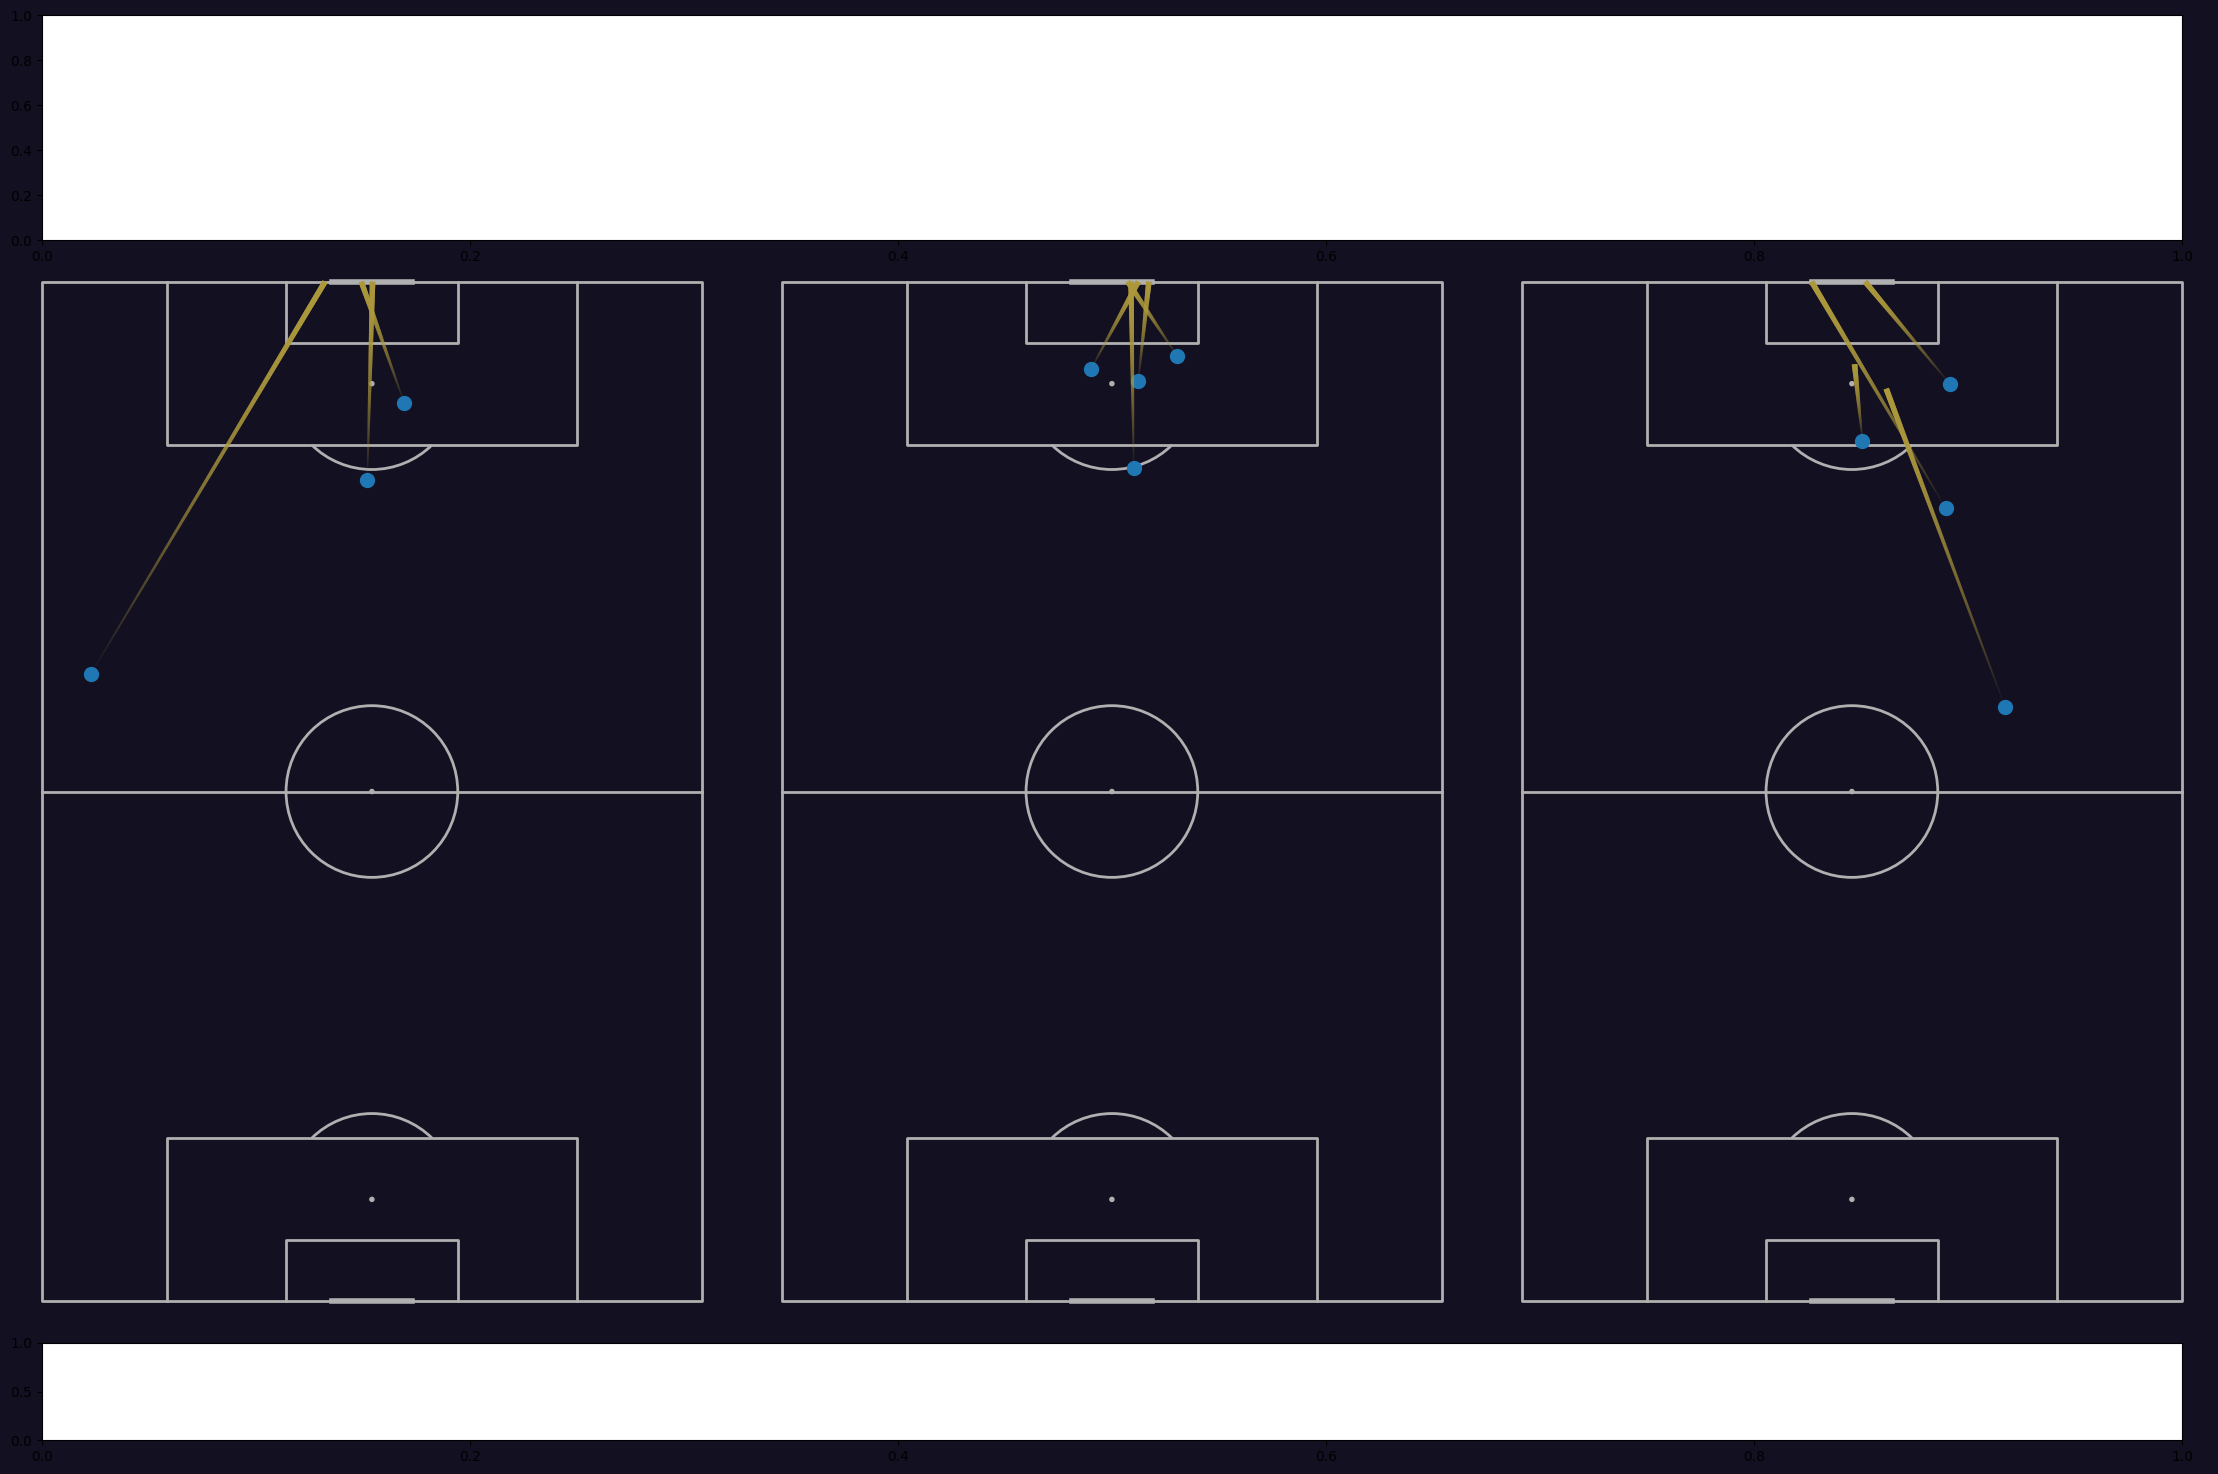

In [78]:
pitch = VerticalPitch(pitch_type='wyscout', pitch_color='#131022')
fig, axs = pitch.grid(ncols=3, figheight=15)
fig.set_facecolor('#131022')

raphinha_shotslane = pitch.lines(100 - df.loc[df.player == 'Raphinha'].y, df.loc[df.player == 'Raphinha'].x,
                             100 - df.loc[df.player == 'Raphinha'].endY, df.loc[df.player == 'Raphinha'].endX,
                             lw=4, transparent=True, comet=True, label='Raphinha',
                             color='#ad993c', ax=axs['pitch'][0])
raphinha_shot = pitch.scatter(100 - df.loc[df.player == 'Raphinha'].y, df.loc[df.player == 'Raphinha'].x, s= 100, ax=axs['pitch'][0])

lewy_shotslane = pitch.lines(100 - df.loc[df.player == 'Robert Lewandowski'].y, df.loc[df.player == 'Robert Lewandowski'].x,
                             100 - df.loc[df.player == 'Robert Lewandowski'].endY, df.loc[df.player == 'Robert Lewandowski'].endX,
                             lw=4, transparent=True, comet=True, label='Robert Lewandowski',
                             color='#ad993c', ax=axs['pitch'][1])
lewy_shot = pitch.scatter(100 - df.loc[df.player == 'Robert Lewandowski'].y, df.loc[df.player == 'Robert Lewandowski'].x, s= 100, ax=axs['pitch'][1])
yamal_shotslane = pitch.lines(100 - df.loc[df.player == 'Lamine Yamal'].y, df.loc[df.player == 'Lamine Yamal'].x,
                             100 - df.loc[df.player == 'Lamine Yamal'].endY, df.loc[df.player == 'Lamine Yamal'].endX,
                             lw=4, transparent=True, comet=True, label='Lamine Yamal',
                             color='#ad993c', ax=axs['pitch'][2])
yamal_shot = pitch.scatter(100 - df.loc[df.player == 'Lamine Yamal'].y, df.loc[df.player == 'Lamine Yamal'].x, s= 100, ax=axs['pitch'][2])

In [50]:
df.loc[:, ['x', 'y', 'endX','endY']]

,x,y,endX,endY
1,54.9,11.9,48.4,0.0
3,64.8,10.0,52.0,0.0
7,59.9,7.3,52.4,0.0
8,54.0,9.7,55.6,0.0
12,46.8,8.6,54.0,0.0
13,7.4,38.5,42.9,0.0
14,53.3,18.3,52.9,0.0
16,73.2,41.7,55.2,10.5
18,64.2,22.2,43.9,0.0
22,49.3,19.4,50.1,0.0
